In [18]:

import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image

# Keras Libraries
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
mainDIR = os.listdir('chest_xray')
print(mainDIR)


['test', 'train', 'val', '__MACOSX']


In [20]:
train_folder= 'chest_xray/train/'
val_folder = 'chest_xray/val/'
test_folder = 'chest_xray/test/'

In [21]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'
print(train_n)

chest_xray/train/NORMAL/




 Normal data 
Length  : 1341
normal picture title:  NORMAL2-IM-0855-0001.jpeg


 Pneumonia data 
Length   : 3875
pneumonia picture title: person379_virus_762.jpeg


Text(0.5, 1.0, 'Pneumonia')

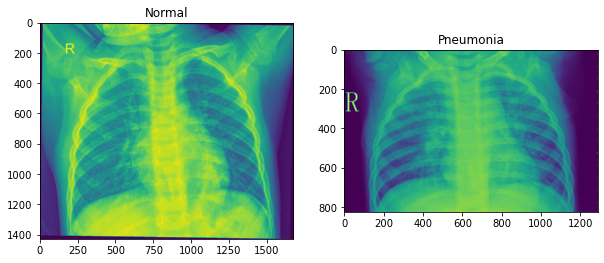

In [22]:
#Normal pic 
print("\n\n Normal data ")
print('Length  :',len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
norm_pic_address = train_n+norm_pic
print('normal picture title: ',norm_pic)


#Pneumonia
print("\n\n Pneumonia data ")
print('Length   :',len(os.listdir(train_p)))
rand_p = np.random.randint(0,len(os.listdir(train_p)))
sic_pic =  os.listdir(train_p)[rand_p]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

In [23]:
# let's build the CNN model

cnn = Sequential()

#Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

#Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])






In [24]:
num_of_test_samples = 600
batch_size = 32

In [25]:
# Fitting the CNN to the images
# The function ImageDataGenerator augments your image by iterating through image as your CNN is getting ready to process that image

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory('chest_xray/val/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [26]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [27]:
cnn_model = cnn.fit(training_set,
                         epochs = 1,
                         validation_data = validation_generator,
                         )


163/163 [==============================] - 146s 885ms/step - loss: 0.3751 - accuracy: 0.8405 - val_loss: 0.3929 - val_accuracy: 0.8125


In [28]:
test_accu = cnn.evaluate(test_set)


20/20 [==============================] - 14s 701ms/step - loss: 0.4477 - accuracy: 0.7756


In [29]:
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 77.56410241127014 %


In [46]:
file1 = open('myfile.txt', 'w')

for layer in range(len(cnn.layers)):
    s = str(cnn.get_weights()[layer])
    print(cnn.get_weights()[layer])
    file1.write(s)
file1.close()

[[[[-7.41617754e-02 -4.01168913e-02  1.30478933e-01  1.42543077e-01
    -1.04002198e-02 -9.36826766e-02 -5.51901646e-02  1.01101264e-01
    -1.05993211e-01 -1.90467462e-02  7.10674748e-02 -8.09275284e-02
    -9.05804411e-02  1.34471714e-01 -1.75973363e-02  1.28709286e-01
    -1.06532045e-01 -1.06404677e-01 -3.76812033e-02 -1.17291898e-01
    -4.81043942e-02  9.17452350e-02  3.67980376e-02  1.39422402e-01
     1.40045002e-01  2.11737398e-02  1.32712096e-01 -1.08773954e-01
    -1.17148243e-01 -3.26241553e-02 -4.73258132e-03  9.91565362e-02]
   [-6.17002919e-02  2.88164504e-02 -1.28650397e-01 -1.05220145e-02
     2.73056421e-02  6.11493774e-02  7.43370056e-02 -1.47908375e-01
     5.53764887e-02 -4.89822961e-02  1.14572696e-01 -2.50389576e-02
    -6.21395819e-02  8.53249803e-02 -2.16632895e-02 -1.09142937e-01
     2.75796410e-02  2.55908370e-02 -8.22954550e-02 -1.38504326e-01
     4.88892905e-02  4.82417233e-02 -1.58110201e-01  2.57852804e-02
    -6.23295177e-03 -7.17573240e-02  1.10778019

In [30]:
Y_pred = cnn.predict(test_set, 100)
y_pred = np.argmax(Y_pred, axis=1)



20/20 [==============================] - 13s 622ms/step


In [37]:
# Accuracy 
...
# list all data in history
print(cnn_model.history['accuracy'])
print(cnn_model.history['val_accuracy'])
print(cnn_model.history['loss'])
print(cnn_model.history['val_loss'])


print(cnn_model.history.keys())

# plt.plot(cnn_model.history['accuracy'])
# plt.plot(cnn_model.history['val_accuracy'])
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Training set', 'Validation set'], loc='upper left')
# plt.show()


[0.8404908180236816]
[0.8125]
[0.3751199543476105]
[0.39292627573013306]
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
# Loss 

plt.plot(cnn_model.history['val_loss'])
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

# <font color='red'> What this means? </font>
The world of medical imaging is ripe for a revolution in terms of deploying CNN based technologies. There is no need for a doctor or a health care provider to ponder these images to gauge things. This is not a shot at doctors or their jobs! The task of reading these is incredibly menial and repititive. Those are two things that AI technologies are great at. I will be working with some more bio-medical imaging dataset just to get more practice and probably create some web applications online for atleast one of them!!